In [132]:
import numpy as np


n_points = 200
x_points= np.random.uniform(0, 10, n_points)

sigma = 2000
noise = np.random.normal(0, sigma, 200)

def true_model(x):
    return 3000*x + 5000

y = true_model(x_points) + noise

x_all = np.array(x_points)
y_all = np.array(y)


indices = np.arange(n_points)
np.random.shuffle(indices)


tr_x = indices[:160]

te_x = indices[160:]

x_train = x_all[tr_x]
x_test = x_all[te_x]

y_train = y_all[tr_x]
y_test = y_all[te_x]

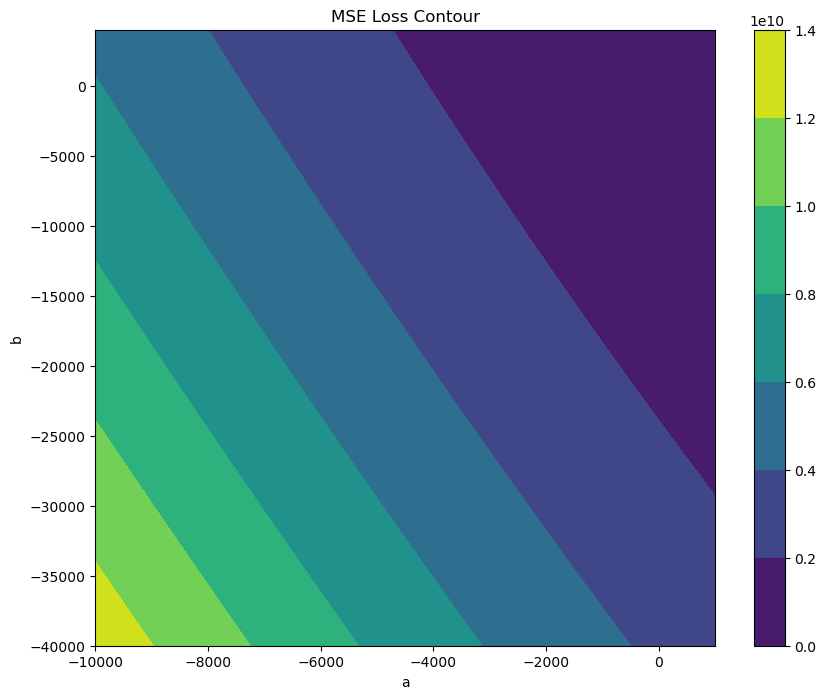

MSE Loss with true parameters on training data: [[1.32812060e+10 1.32104891e+10 1.31399678e+10 ... 3.12770432e+09
  3.09553568e+09 3.06356272e+09]
 [1.32327133e+10 1.31621180e+10 1.30917183e+10 ... 3.10316666e+09
  3.07111961e+09 3.03926825e+09]
 [1.31843184e+10 1.31138447e+10 1.30435666e+10 ... 3.07872676e+09
  3.04680132e+09 3.01507155e+09]
 ...
 [5.61579705e+09 5.56903515e+09 5.52246892e+09 ... 1.81434042e+08
  1.73220420e+08 1.65202474e+08]
 [5.58656610e+09 5.53992580e+09 5.49348117e+09 ... 1.76158111e+08
  1.68066088e+08 1.60169741e+08]
 [5.55743292e+09 5.51091422e+09 5.46459120e+09 ... 1.70979955e+08
  1.63009531e+08 1.55234783e+08]]


In [133]:
import numpy as np
import matplotlib.pyplot as plt



def linear_model(x, a, b):
    return a * x + b





def mse_loss(params_vec, x_train, y_train):
    a, b = params_vec
    y_pred = linear_model(x_train, a, b)
    return np.mean((y_pred - y_train)**2)

a = np.linspace(-10000, 1000, 200)
b = np.linspace(-40000, 4000, 200)

A, B = np.meshgrid(a, b)

z = np.zeros_like(A)
for i in range (A.shape[0]):
    for j in range (A.shape[1]):
        z[i, j] = mse_loss([A[i, j], B[i, j]], x_train, y_train)




plt.figure(figsize=(10, 8))
contour = plt.contourf(A, B, z)
plt.colorbar(contour)
plt.xlabel("a")
plt.ylabel("b")
plt.title("MSE Loss Contour")
plt.show()
print("MSE Loss with true parameters on training data:", z)





In [134]:
def mse_stochastic_gradient(params_vec, x_batch, y_batch):
    a, b = params_vec
    y_pred = a * x_batch + b
    da = (-2 / len(x_batch)) * np.sum(x_batch * (y_batch - y_pred))
    db = (-2 / len(x_batch)) * np.sum(y_batch - y_pred)
    return np.array([da, db])




In [135]:
params_vec = np.array([0.0, 0.0])  # [a, b]

epochs = 1000
batch_size = 40

# SGD loop
for epoch in range(epochs):
    indices = np.random.choice(len(x_train), batch_size, replace=False)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    grad = mse_stochastic_gradient(params_vec, x_batch, y_batch)
    params_vec -= lr * grad  # update parameters

print("Final parameters:", params_vec)

Final parameters: [2981.70456495 5052.88812705]


In [136]:
#Solution 1.2

def momentum_optimization_path(initial_guess, beta, learning_rate, batch_size, conv_criterion = 60, max_iter = 10000):
    params_vec = initial_guess.copy()
    m = np.zeros_like(params_vec)
    path = [params_vec.copy()]

    for it in range (1, max_iter+1):
        xi = np.random.choice(len(x_train), batch_size, replace = False)
        x_batch, y_batch = x_train[xi], y_train[xi]
        s = mse_stochastic_gradient(params_vec, x_batch, y_batch)
        
        
        m = beta*m - alpha*s
        params_vec = params_vec + m

        path.append(params_vec.copy())

        if np.linalg.norm(s) < conv_criterion :
            break

    return np.vstack(path)


Starting point: [    0. -1000.]
Final coordinates: [3028.98346128 5105.53611609]
MSE at final: 4375546.02435944


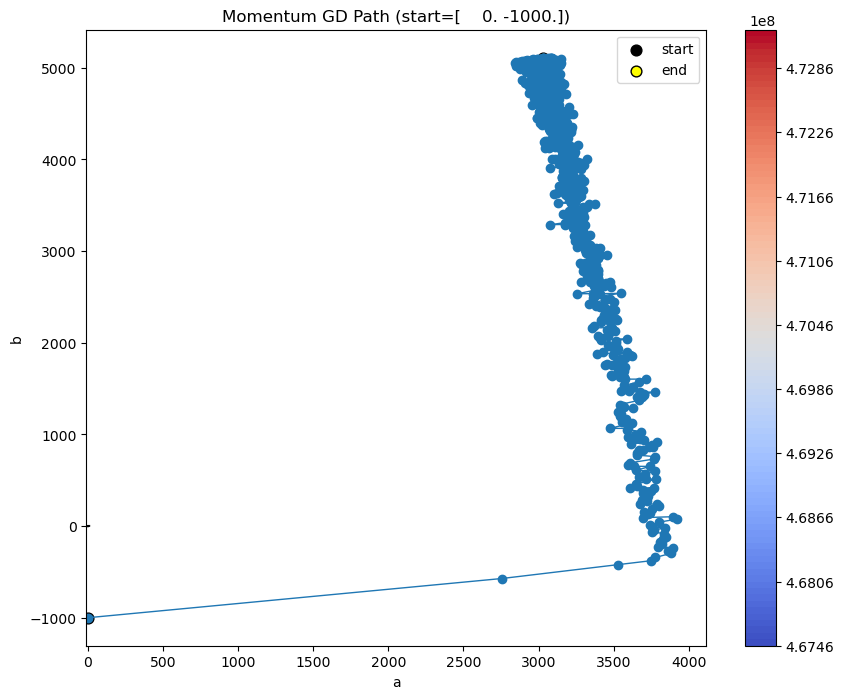

In [137]:


def plot_contour_figure(x_train, y_train):
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            a_val = X[i, j]
            b_val = Y[i, j]
            y_pred = a_val * x_train + b_val
            Z[i, j] = np.mean((y_train - y_pred)**2)
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path, x_train, y_train):
    fig, ax = plot_contour_figure(x_train, y_train)
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()

initial_guess = np.array([0.0, -1000.0])
alpha = 0.01
learning_rate = alpha
beta = 0.5
batch_size = 20

path = momentum_optimization_path(initial_guess, learning_rate, beta, batch_size)


print("Starting point:", initial_guess)


print("Final coordinates:", path[-1])
print("MSE at final:", mse_loss(path[-1], x_train, y_train))

# Plot the path
show_path(f"Momentum GD Path (start={initial_guess})", path, x_train, y_train)

Starting point: [    0. -1000.]
Final coordinates: [3138.21754455 4373.55898375]
MSE at final: 4503127.113322702


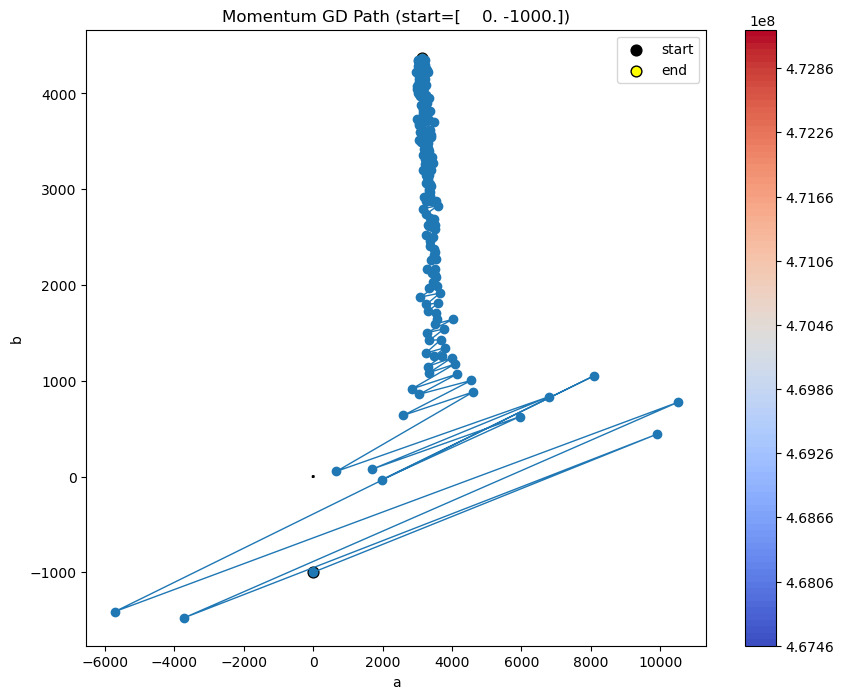

In [144]:
#solution 1.3

#Solution 1.2

def momentum_optimization_path(initial_guess, beta, alpha, batch_size, conv_criterion = 60, max_iter = 200):
    params_vec = initial_guess.copy()
    m = np.zeros_like(params_vec)
    path = [params_vec.copy()]

    for i in range (1, max_iter+1):
        alpha = alpha0 * (gamma**(i/k))
        xi = np.random.choice(len(x_train), batch_size, replace = False)
        x_batch, y_batch = x_train[xi], y_train[xi]
        s = mse_stochastic_gradient(params_vec, x_batch, y_batch)
        
        
        m = beta*m - alpha*s
        params_vec = params_vec + m

        path.append(params_vec.copy())

        if np.linalg.norm(s) < conv_criterion :
            break

    return np.vstack(path)






def plot_contour_figure(x_train, y_train):
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            a_val = X[i, j]
            b_val = Y[i, j]
            y_pred = a_val * x_train + b_val
            Z[i, j] = np.mean((y_train - y_pred)**2)
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path, x_train, y_train):
    fig, ax = plot_contour_figure(x_train, y_train)
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()

initial_guess = np.array([0.0, -1000.0])
alpha0 = 0.03
learning_rate = alpha
beta = 0.9
batch_size = 20
gamma = 0.80
k = 50
path = momentum_optimization_path(initial_guess, alpha, beta, batch_size)


print("Starting point:", initial_guess)


print("Final coordinates:", path[-1])
print("MSE at final:", mse_loss(path[-1], x_train, y_train))

# Plot the path
show_path(f"Momentum GD Path (start={initial_guess})", path, x_train, y_train)
